In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import os

In [2]:
indeed_data = "indeed_job_dataset.csv"

In [3]:
df = pd.read_csv(indeed_data)
df.info()
# questions:
# top five induestries
# top five companies in those industries
# rating of the companies
#company revenue has sig abouts of null values 2017/5715, consider not using 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5715 entries, 0 to 5714
Data columns (total 43 columns):
Unnamed: 0                          5715 non-null int64
Job_Title                           5715 non-null object
Link                                5715 non-null object
Queried_Salary                      5715 non-null object
Job_Type                            5715 non-null object
Skill                               5483 non-null object
No_of_Skills                        5715 non-null int64
Company                             5611 non-null object
No_of_Reviews                       4753 non-null float64
No_of_Stars                         4753 non-null float64
Date_Since_Posted                   5611 non-null float64
Description                         5413 non-null object
Location                            5463 non-null object
Company_Revenue                     2017 non-null object
Company_Employees                   3199 non-null object
Company_Industry                    3

In [4]:
# Collect only relevant columns 
columns = [
    'Company_Industry',
    'Company',
    'No_of_Stars',
]
df_company = df[columns]


In [5]:
#removing nulls from dataset
df_company = df_company[df_company.Company_Industry.notnull()]
df_company.head(10)

,Company_Industry,Company,No_of_Stars
0,Health Care,Express Scripts,3.3
3,Government,Central Intelligence Agency,4.3
4,Banks and Financial Services,Federal Reserve Bank of Dallas,4.1
6,Government,NYC Careers,3.8
8,Education and Schools,University of Idaho,4.2
9,Government,usajobs.gov,4.3
10,Education and Schools,The University of Pittsburgh,4.2
11,Education and Schools,The University of Pittsburgh,4.2
12,Education and Schools,Rice University,4.3
14,Consulting and Business Services,Catalina Marketing,3.2


# Top Industries:

In [6]:
#Review unique industry names in dataset
industries = df_company.Company_Industry.unique()
industries

array(['Health Care', 'Government', 'Banks and Financial Services',
       'Education and Schools', 'Consulting and Business Services',
       'Energy and Utilities', 'Aerospace and Defense',
       'Internet and Software', 'Transport and Freight', 'Organization',
       'Telecommunications', 'Retail', 'Computers and Electronics',
       'Consumer Goods and Services', 'Insurance',
       'Restaurants, Travel and Leisure', 'Media, News and Publishing',
       'Pharmaceuticals', 'Industrial Manufacturing', 'Auto',
       'Real Estate', 'Human Resources and Staffing',
       'Food and Beverages', 'Construction',
       'RetailConsumer Goods and Services', 'InsuranceHealth Care',
       'Agriculture and Extraction',
       'Industrial ManufacturingAgriculture and Extraction',
       'Industrial ManufacturingConstruction', 'Real EstateReal Estate',
       'Food and BeveragesConsulting and Business Services',
       'Restaurants, Travel and LeisureConsulting and Business Services',
       'I

In [7]:
#top five industries by number of job listings 
series_by_industry = df_company['Company_Industry'].value_counts()
series_by_industry.head(5)

Consulting and Business Services    733
Internet and Software               647
Banks and Financial Services        459
Health Care                         339
Insurance                           227
Name: Company_Industry, dtype: int64

In [8]:
series_by_industry_top5 = series_by_industry.sort_values(ascending=False)[:5]
top_5_industries = series_by_industry_top5.index

In [9]:
target_values = series_by_industry_top5.values
target_values

array([733, 647, 459, 339, 227], dtype=int64)

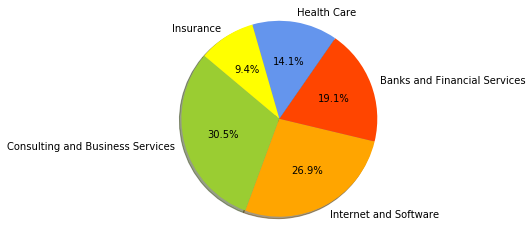

In [10]:
#plotting pie chart

target_series = series_by_industry_top5


labels = target_series.index
sizes = target_series.values
colors = ["yellowgreen","orange","orangered","cornflowerblue","yellow"]
explode = (0.1,0,0,0,0)

#Plot; note 'tight' allows for all text to be displayed on PDF
plt.pie(sizes,  labels=labels,  colors = colors, autopct='%1.1f%%', shadow=True, startangle=140, textprops={'color':"black"})

plt.axis('equal')
plt.savefig('piechart_top5.png', bbox_inches="tight", transparent = True)

plt.show()


# Top Companies Within Industries

In [11]:
df_company.head()

,Company_Industry,Company,No_of_Stars
0,Health Care,Express Scripts,3.3
3,Government,Central Intelligence Agency,4.3
4,Banks and Financial Services,Federal Reserve Bank of Dallas,4.1
6,Government,NYC Careers,3.8
8,Education and Schools,University of Idaho,4.2


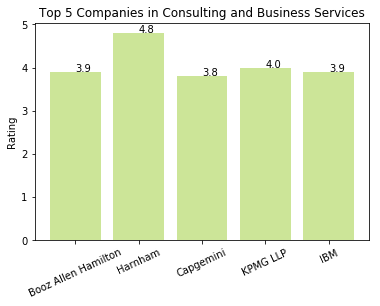

In [12]:
#list top five companies per top five industries- Industry 1

top_5_industry_1 = df_company.loc[df_company['Company_Industry'] == 'Consulting and Business Services', :]

rating_table = top_5_industry_1.groupby(['Company']).agg(['mean'])

job_count_table = top_5_industry_1.groupby(['Company']).agg(['count'])


job_count_table = job_count_table['Company_Industry']
finalTable = pd.concat([job_count_table,rating_table], axis=1) 
finalTable = finalTable.sort_values(by=['count'], ascending=False)
finalTable = finalTable[:5]

finalTable = finalTable['No_of_Stars', 'mean']
labels = finalTable.index
sizes = finalTable.values

objects = labels
y_pos = np.arange(len(objects))
performance = sizes
color= ('yellowgreen')
# plt.rcParams['xtick.bottom'] = plt.rcParams['xtick.labelbottom'] = True
# plt.rcParams['xtick.top'] = plt.rcParams['xtick.labeltop'] = False
plt.bar(y_pos, performance, align='center', color = color, alpha=0.5)
plt.xticks(y_pos, objects,rotation=25)
plt.ylabel('Rating')
plt.title('Top 5 Companies in Consulting and Business Services')

for i, v in enumerate(sizes):
    plt.text(y_pos[i] , v + 0.01, str(round(v, 2)))
    
plt.savefig('barind3.png', bbox_inches="tight", transparent = True)
plt.show()


       

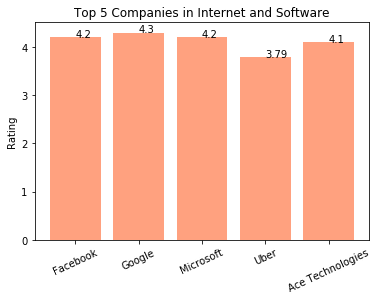

In [13]:
#list top five companies per top five industries- Industry 2

top_5_industry_1 = df_company.loc[df_company['Company_Industry'] == 'Internet and Software', :]

rating_table = top_5_industry_1.groupby(['Company']).agg(['mean'])

job_count_table = top_5_industry_1.groupby(['Company']).agg(['count'])


job_count_table = job_count_table['Company_Industry']
finalTable = pd.concat([job_count_table,rating_table], axis=1) 
finalTable = finalTable.sort_values(by=['count'], ascending=False)
finalTable = finalTable[:5]

finalTable = finalTable['No_of_Stars', 'mean']
labels = finalTable.index
sizes = finalTable.values

objects = labels
y_pos = np.arange(len(objects))
performance = sizes
color= ('orangered')
# plt.rcParams['xtick.bottom'] = plt.rcParams['xtick.labelbottom'] = True
# plt.rcParams['xtick.top'] = plt.rcParams['xtick.labeltop'] = False
plt.bar(y_pos, performance, align='center', color = color, alpha=0.5)
plt.xticks(y_pos, objects,rotation=25)
plt.ylabel('Rating')
plt.title('Top 5 Companies in Internet and Software')

for i, v in enumerate(sizes):
    plt.text(y_pos[i] , v + 0.01, str(round(v, 2)))
    
plt.savefig('barind3.png', bbox_inches="tight", transparent = True)
plt.show()


       

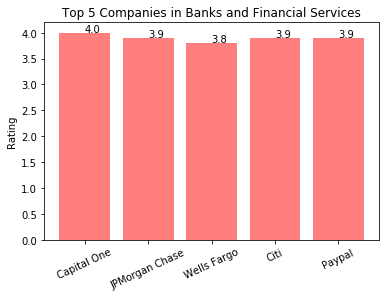

In [14]:
#list top five companies per top five industries- Industry 3

top_5_industry_1 = df_company.loc[df_company['Company_Industry'] == 'Banks and Financial Services', :]

rating_table = top_5_industry_1.groupby(['Company']).agg(['mean'])

job_count_table = top_5_industry_1.groupby(['Company']).agg(['count'])


job_count_table = job_count_table['Company_Industry']
finalTable = pd.concat([job_count_table,rating_table], axis=1) 
finalTable = finalTable.sort_values(by=['count'], ascending=False)
finalTable = finalTable[:5]

finalTable = finalTable['No_of_Stars', 'mean']
labels = finalTable.index
sizes = finalTable.values

objects = labels
y_pos = np.arange(len(objects))
performance = sizes
color= ('red')
# plt.rcParams['xtick.bottom'] = plt.rcParams['xtick.labelbottom'] = True
# plt.rcParams['xtick.top'] = plt.rcParams['xtick.labeltop'] = False
plt.bar(y_pos, performance, align='center', color = color, alpha=0.5)
plt.xticks(y_pos, objects,rotation=25)
plt.ylabel('Rating')
plt.title('Top 5 Companies in Banks and Financial Services')

for i, v in enumerate(sizes):
    plt.text(y_pos[i] , v + 0.01, str(round(v, 2)))
    
plt.savefig('barind3.png', bbox_inches="tight", transparent = True)
plt.show()


       

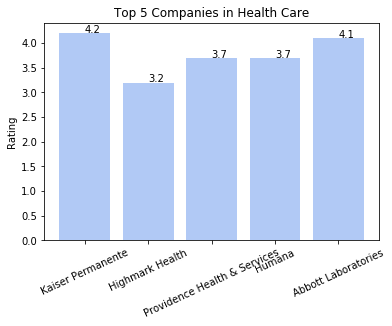

In [15]:
#list top five companies per top five industries- Industry 4

top_5_industry_1 = df_company.loc[df_company['Company_Industry'] == 'Health Care', :]

rating_table = top_5_industry_1.groupby(['Company']).agg(['mean'])

job_count_table = top_5_industry_1.groupby(['Company']).agg(['count'])


job_count_table = job_count_table['Company_Industry']
finalTable = pd.concat([job_count_table,rating_table], axis=1) 
finalTable = finalTable.sort_values(by=['count'], ascending=False)
finalTable = finalTable[:5]

finalTable = finalTable['No_of_Stars', 'mean']
labels = finalTable.index
sizes = finalTable.values

objects = labels
y_pos = np.arange(len(objects))
performance = sizes
color= ('cornflowerblue')
# plt.rcParams['xtick.bottom'] = plt.rcParams['xtick.labelbottom'] = True
# plt.rcParams['xtick.top'] = plt.rcParams['xtick.labeltop'] = False
plt.bar(y_pos, performance, align='center', color = color, alpha=0.5)
plt.xticks(y_pos, objects,rotation=25)
plt.ylabel('Rating')
plt.title('Top 5 Companies in Health Care')

for i, v in enumerate(sizes):
    plt.text(y_pos[i] , v + 0.01, str(round(v, 2)))
    
plt.savefig('barind3.png', bbox_inches="tight", transparent = True)
plt.show()


       

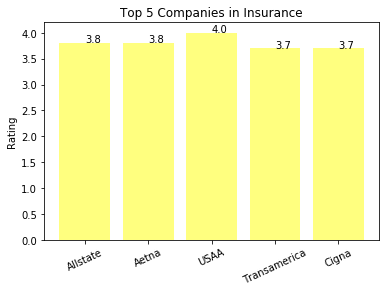

In [16]:
#list top five companies per top five industries- Industry 5

top_5_industry_1 = df_company.loc[df_company['Company_Industry'] == 'Insurance', :]

rating_table = top_5_industry_1.groupby(['Company']).agg(['mean'])

job_count_table = top_5_industry_1.groupby(['Company']).agg(['count'])


job_count_table = job_count_table['Company_Industry']
finalTable = pd.concat([job_count_table,rating_table], axis=1) 
finalTable = finalTable.sort_values(by=['count'], ascending=False)
finalTable = finalTable[:5]

finalTable = finalTable['No_of_Stars', 'mean']
labels = finalTable.index
sizes = finalTable.values

objects = labels
y_pos = np.arange(len(objects))
performance = sizes
color= ('yellow')
# plt.rcParams['xtick.bottom'] = plt.rcParams['xtick.labelbottom'] = True
# plt.rcParams['xtick.top'] = plt.rcParams['xtick.labeltop'] = False
plt.bar(y_pos, performance, align='center', color = color, alpha=0.5)
plt.xticks(y_pos, objects,rotation=25)
plt.ylabel('Rating')
plt.title('Top 5 Companies in Insurance')

for i, v in enumerate(sizes):
    plt.text(y_pos[i] , v + 0.01, str(round(v, 2)))
    
plt.savefig('barind3.png', bbox_inches="tight", transparent = True)
plt.show()


       

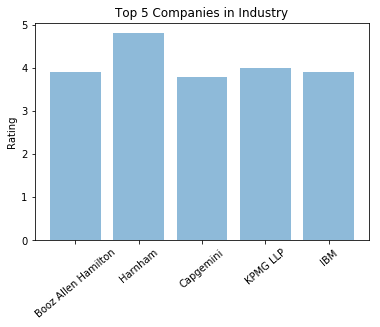

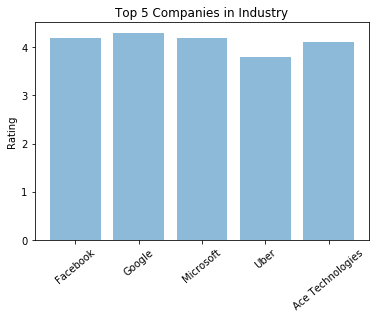

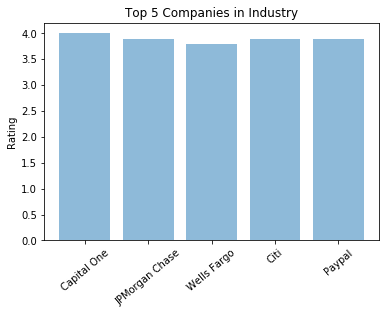

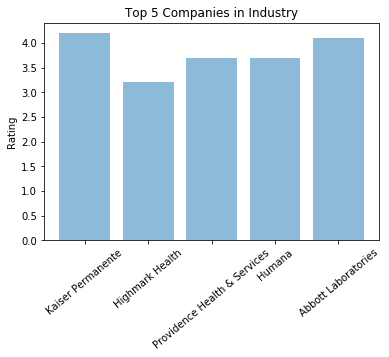

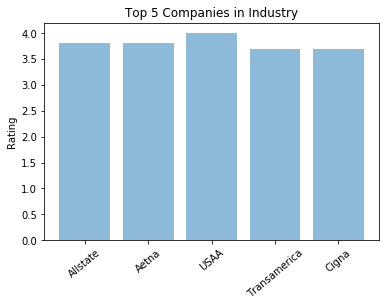

In [17]:
#four looping companies per top five industries

for i in target_series.index :
    top_5_industry_1 = df_company.loc[df_company['Company_Industry'] == i, :]

    rating_table = top_5_industry_1.groupby(['Company']).agg(['mean'])

    job_count_table = top_5_industry_1.groupby(['Company']).agg(['count'])




    job_count_table = job_count_table['Company_Industry']
    finalTable = pd.concat([job_count_table,rating_table], axis=1) 
    finalTable = finalTable.sort_values(by=['count'], ascending=False)
    finalTable = finalTable[:5]

    finalTable = finalTable['No_of_Stars', 'mean']
   
    labels = finalTable.index
    sizes = finalTable.values
    objects = labels
    y_pos = np.arange(len(objects))
    performance = sizes
    colors = colors = ["yellowgreen","orange","orangered","cornflowerblue","yellow"]

    plt.bar(y_pos, performance, align='center', alpha=0.5)
    plt.xticks(y_pos, objects,rotation=40)
    plt.ylabel('Rating')
    plt.title('Top 5 Companies in Industry')



    plt.show()
       

# Company Reviews:

In [18]:
#Part A
df_industry_count = df_company.groupby(['Company_Industry']).count()
df_industry_count = df_industry_count[['Company']]

df_industry_count = df_industry_count.reset_index()
df_industry_count.head()

,Company_Industry,Company
0,Aerospace and Defense,129
1,Agriculture and Extraction,18
2,Auto,45
3,Banks and Financial Services,459
4,Computers and Electronics,99


In [19]:
#Part B
df_industry_mean = df_company.groupby(['Company_Industry']).mean()
df_industry_mean.reset_index(inplace=True)
df_industry_mean.head().round(2)

,Company_Industry,No_of_Stars
0,Aerospace and Defense,4.00
1,Agriculture and Extraction,4.14
2,Auto,3.68
3,Banks and Financial Services,3.81
4,Computers and Electronics,3.93


In [31]:
#Merge between A+B
df_company_sort = df_industry_mean.merge(df_industry_count).sort_values(['Company'],ascending=False)
df_company_sort.reset_index(inplace=True)
df_company_sort.head().round(2)

,index,Company_Industry,No_of_Stars,Company
0,6,Consulting and Business Services,3.95,733
1,21,Internet and Software,3.99,647
2,3,Banks and Financial Services,3.81,459
3,13,Health Care,3.79,339
4,19,Insurance,3.77,227


In [21]:
df_company['No_of_Stars'].describe()

count    3775.000000
mean        3.875417
std         0.358757
min         2.000000
25%         3.700000
50%         3.900000
75%         4.100000
max         5.000000
Name: No_of_Stars, dtype: float64

In [22]:
#27.95% corr between the # of job postings and the average star rating 
import seaborn as sns
data2 = df_company_sort
corr = data2.corr()
corr

,index,No_of_Stars,Company
index,1.000000,-0.202705,-0.216501
No_of_Stars,-0.202705,1.000000,0.279528
Company,-0.216501,0.279528,1.000000


In [23]:
series_by_industry.head(5)

Consulting and Business Services    733
Internet and Software               647
Banks and Financial Services        459
Health Care                         339
Insurance                           227
Name: Company_Industry, dtype: int64